In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import powerlaw
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io as sio

from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark

from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

import os
from os.path import expanduser

In [2]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 7})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"

In [6]:
# paths
save_fig_path = '../figs/'

load_path =  '../paper_figures_data/fig6/'
abc_path = '../paper_figures_data/fig6/'

In [4]:
def sing_exp(x, a, t1):
    return a * np.exp(-x/t1) 

def sing_exp_oscil(x, a, t1, coef, phase):
    f = 2
    return a * (coef * np.exp(-x/t1)  + (1-coef) * np.sqrt(2)*np.sin(phase + 2* np.pi*0.001 * f * x))

def double_exp(x, a, b, t1, t2):
    return a * (1-b) * np.exp(-x/t1) + a * (b) * np.exp(-x/t2) 

# Fitting neural data

- load data

In [5]:
def comp_cdf(d1,d2,num_samples,eval_start):
    d1_sorted = np.sort(d1)
    d2_sorted = np.sort(d2)
    eval_points = np.sort(np.unique(np.concatenate((d1_sorted[eval_start:],d2_sorted[eval_start:]))))
    cdf1 = []
    cdf2 = []
    for i in range(len(eval_points)):
        ind1 = np.where(d1_sorted<= eval_points[i])
        if np.size(ind1):
            cdf1.append((np.max(ind1)+1)/num_samples)
        else:
            cdf1.append(0)
        ind2 = np.where(d2_sorted<= eval_points[i])
        if np.size(ind2):
            cdf2.append((np.max(ind2)+1)/num_samples)
        else:
            cdf2.append(0)
    bf = np.array(cdf2)/np.array(cdf1)
    return cdf1, cdf2, eval_points, bf

In [8]:
binSize = 1

# single OU -1
ac_garf =  np.load(load_path + 'garf_hop_2013_06_18_fix_T3000.npy',allow_pickle=True)
data_map =  np.load(load_path + 'best_abcFit_linDist_1on_garf_fitupto150_T1000_lag200_withGammaSpikes_step28.npy',allow_pickle=True)
ac_map_sing = data_map[0]
abc_sing =  np.load(abc_path + '1on_garf_linDist_GammaSpikes_lag150_steps28.npy',allow_pickle=True)
step_sing = 28
d_1abc_150 = np.load(load_path + 'dABC_1on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150_step28.npy',allow_pickle=True)


# double OU -2, 150
data_map = np.load(load_path + 'best_abcFit_linDist_step37_2on_garf_fitupto150_lag200_withGammaSpikes_2.npy',allow_pickle=True)
ac_map_db_150 = data_map[0]
map_params_db_150 = data_map[1]
abc_db_150 =  np.load(abc_path + '2on_garf_linDist_gammaSpikes_lag150_steps37.npy',allow_pickle=True)
step_db_150 = 37

d_abc_150 = np.load(load_path + 'dABC_2on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150_step37.npy',allow_pickle=True)
d2 = np.load(load_path + '2_dABC_2on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150_step37.npy',allow_pickle=True)
d_abc_150 = np.concatenate((d_abc_150, d2))
d_abc_post_150 = np.load(load_path + 'dABC_post_2on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150_step37.npy',allow_pickle=True)


d_exp_150 = np.load(load_path + 'dABC_2Exp150on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150.npy',allow_pickle=True)
d2 = np.load(load_path + '2_dABC_2Exp150on_linDist_withGammaSpikes_garf_hop_2013_06_18_fix_T3000_timeLag150.npy',allow_pickle=True)
d_exp_150 = np.concatenate((d_exp_150, d2))

num_samples = 1000
eval_start = 1
cdf_abc_150, cdf_exp_150, eval_points_exp_abc, bf = comp_cdf(d_abc_150,d_exp_150,num_samples,eval_start)
cdf_2tau_150, cdf_1tau_150, eval_points_2_1_tau, bf = comp_cdf(d_abc_post_150,d_1abc_150,num_samples,eval_start)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:153: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


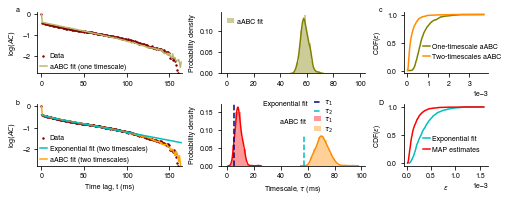

In [9]:
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(20.5*cm, 7.2*cm))
fig.subplots_adjust(hspace=2, wspace=1.7)


ft = 7
fleg = 7
fleg2 = 7
fs = 7
ferr = 7

cABC = 'darkorange'
cABC2 = 'r'
cABC3 = 'gold' 
# cAC = plt.cm.Reds(250)
cAC = 'maroon'
# cMAP1 = 'DarkKhaki'
cMAP1 = 'olive'
cMAP11 = 'DarkKhaki'
cCDF1tau = 'olive'
cMAP = 'orange'
cAccR = 'deepskyblue'
cErr = 'r'
ctheor = 'gray'
ctheor2 = 'k'
cExp = 'c'
# cAccept = 'g'
cAccept = 'k'

ss = 2
a = 0.4 #transparency
lw = 1.5
lw2 = 1.5

timeLag_label = r'Time lag, t (ms)'
log_ac_label = r'log$(AC)$'
prob_label = r'Probability density'
data_label = r'Data'
abc_fit_label_ac_1tau = r'aABC fit (one timescale)'
abc_fit_label_ac_2tau = r'aABC fit (two timescales)'
exp_fit_label_1tau = r'Exponential fit (one timescale)'
exp_fit_label_2tau = r'Exponential fit (two timescales)'

abc_fit_label_tau = r'aABC fit'
exp_fit_label_tau = r'Exponential fit'
abc_fit_label_tau1 = r'$\tau_1$'
abc_fit_label_tau2 = r'$\tau_2$'
exp_fit_label_tau1 = r'$\tau_1$'
exp_fit_label_tau2 = r'$\tau_2$'

one_tau_err = r'One-timescale aABC'
two_tau_err = r'Two-timescales aABC'

map_err_label = 'MAP estimates'
exp_err_label = 'Exponential fit'


time_label = r'Timescale, $\tau$ (ms)'
err_label = r'$\varepsilon$'
cdf_label = r'CDF($\varepsilon$)'

x_text = -0.15
y_text = 1 
x_text2 = -0.3
y_text2 = y_text

hspace1 = 0.4
hl = 1. # handle length

x = 4
y = 8

############### one timescale fit ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 0), colspan=3,rowspan=2)
ax.text(x_text,y_text,'a',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_garf
ac = ac/ac[0]
binLags = np.arange(0, 3000 + binSize, binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label=data_label, s = ss)

ac = ac_map_sing[0:165]
ac = ac/ac[0]
binLags = np.arange(0, 164 + binSize, binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP11 ,label=abc_fit_label_ac_1tau,\
        linewidth = lw)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, bbox_to_anchor=(-0.025, -0.06),\
          loc='lower left', handletextpad= hspace1, handlelength = hl)
# plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2.8,0.1])
plt.xlim([-5,165])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 3), colspan=3,rowspan=2)

abc = abc_sing
step = step_sing
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(0,100,1), facecolor= cMAP1, density=True, alpha = a, label = abc_fit_label_tau)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, kernel='gau', color = cMAP1)
plt.ylabel(prob_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, fontsize = fleg2, loc = 'upper left', handletextpad= hspace1, handlelength = hl)

############### model comparison between one-two timescales ###################################################
ax = plt.subplot2grid((x,y), (0, 6), colspan=2,rowspan=2)
ax.text(x_text2,y_text2,'c',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

plt.plot(eval_points_2_1_tau, cdf_1tau_150, color = cCDF1tau, linewidth = lw2, label = one_tau_err)
plt.plot(eval_points_2_1_tau, cdf_2tau_150, color = cABC, linestyle = '-', linewidth = lw2, label = two_tau_err)

plt.yticks(np.arange(0,1.01,0.5))
# plt.xlabel(r'$\epsilon$', fontsize = 30)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.ylabel(cdf_label)
# plt.xlim([0, 0.08])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon = False, fontsize = fleg, bbox_to_anchor=(0.15, 0.1), loc='lower left',\
          handletextpad= hspace1, handlelength = hl)


############### two timescales fit, 150 ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 0), colspan=3,rowspan=2)
ax.text(x_text,y_text,'b',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_garf
ac  = ac/ac[0]
binLags = np.arange(0, 3000 + binSize, binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label=data_label, s = ss)

ac = ac_map_db_150[0:165]
ac  = ac/ac[0]
binLags = np.arange(0, 164 + binSize, binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP , linewidth = lw, \
         label=abc_fit_label_ac_2tau)

xdata = binLags[1:150]
ydata = ac_garf[1:150]/ac_garf[0]
popt, pcov = curve_fit(double_exp, xdata,ydata , maxfev = 2000)
timescales = popt[2:]
plt.plot(binLags, np.log10(double_exp(binLags, *popt)), '-', color = cExp, linewidth = lw, \
         label=exp_fit_label_2tau)


handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, bbox_to_anchor=(0.985, 0.25))
ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, bbox_to_anchor=(-0.025, -0.06),\
          loc='lower left', handletextpad= hspace1, handlelength = hl)
# , bbox_to_anchor=(0.88, 0.35)

plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2.8,0.1])
plt.xlim([-5,165])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 3), colspan=3,rowspan=2)

abc = abc_db_150
step = step_db_150
tau1 = abc[step - 1][0][0]
tau2 = abc[step - 1][0][1]
ax.hist(tau1, bins = np.arange(0,50,2), facecolor= cABC2, density=True, alpha = a, label = abc_fit_label_tau1)
ax.hist(tau2, bins = np.arange(0,100,2), facecolor= cABC, density=True, alpha = a, label = abc_fit_label_tau2)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, kernel='gau', color = cABC2)
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, kernel='gau', color = cABC)
plt.axvline(5, linestyle = '--', color = 'navy', label = exp_fit_label_tau1, linewidth = lw)
plt.axvline(57,ymin = 0, ymax = 0.48, linestyle = '--', color = 'c', label = exp_fit_label_tau2, linewidth = lw)

plt.xlabel(time_label, color = cAccept)
plt.ylabel(prob_label, color = cAccept)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_color(cAccept)
ax.tick_params(axis='y', colors=cAccept)
ax.spines['bottom'].set_color(cAccept)
ax.tick_params(axis='x', colors=cAccept)

handles, labels = ax.get_legend_handles_labels()
handles_top, labels_top = [handles[0],handles[1]], [labels[0],labels[1]]
handles_bot, labels_bot = [handles[2],handles[3]], [labels[2],labels[3]]

leg1 = ax.legend(handles_top, labels_top, frameon = False, fontsize = fleg2, bbox_to_anchor=(0.6, 1.2),\
          loc = 'upper left', handletextpad= hspace1, handlelength = hl, labelspacing=0.05)
leg2 = ax.legend(handles_bot, labels_bot, frameon = False, fontsize = fleg2, bbox_to_anchor=(0.6, 0.92),\
          loc = 'upper left', handletextpad= hspace1, handlelength = hl, labelspacing=0.05)

ax.add_artist(leg1)

plt.text(0.29,0.98,exp_fit_label_tau, transform=ax.transAxes, fontsize = fleg)
plt.text(0.41,0.68,abc_fit_label_tau, transform=ax.transAxes, fontsize = fleg)

# ax.legend(frameon = False, fontsize = fleg2, bbox_to_anchor=(0.6, 1.32),loc = 'upper left', handletextpad= hspace1,\
#           handlelength = hl)

############### model comparison between ABC and exp ###################################################
ax = plt.subplot2grid((x,y), (2, 6), colspan=2,rowspan=2)
ax.text(x_text2,y_text2,'D',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

plt.plot(eval_points_exp_abc, cdf_exp_150, color = cExp, linewidth = lw2, label = exp_err_label)
plt.plot(eval_points_exp_abc, cdf_abc_150, color = cABC2, linestyle = '-', linewidth = lw2, label = map_err_label)

# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.yticks(np.arange(0,1.01,0.5))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.xlabel(err_label, fontsize = ferr)
plt.ylabel(cdf_label)
# plt.xlim([0, 0.08])

# Hide the right and top spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon = False, fontsize = fleg, bbox_to_anchor=(0.15, 0.1), loc='lower left',\
          handletextpad= hspace1, handlelength = hl)

# plt.savefig(save_fig_path+'fig6.pdf', bbox_inches='tight')